In [1]:
#Import the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy as sci

import sklearn.ensemble as se
import sklearn.model_selection as ms
import sklearn.metrics as sm
import sklearn.preprocessing as sp
import sklearn.impute as si
import seaborn as sns

import math

In [2]:
#load the raw dataset
pd.set_option('display.max_columns',None)
rawdata = pd.read_excel('Raw AQY data.xlsx')
rawdata.describe(include='all')

,Reference,Number,DOM Category,Isolation way,Light Source,Wavelength Range,Actinometry,Φ3DOM*(10-2),Φ1O2(10-2),Φ·OH(10-4),Temperature,pH,DOC,SUVA254,E2/E3,FIX,HIX,BIX,TMP (mM),TMP Irradiation Time (h),Way of Second-order rate constant,k3DOM TMP (10-9 M-1 s-1),Inhibition Correction,kq (10-5 s-1),FFA (mM),FFA Irradiation Time (h),k1O2 FFA (10-8 M-1 s-1),kd (10-5 s-1),Correction for ·OH,Probe type,Probe (mM),Probe Irradiation Time (h),kProbe ·OH (10-9 M-1 s-1),Yield,Correction for DOC
count,1329.000000,1329.000000,1329,1329,1329,1329,1329,1071.000000,793.000000,499.000000,1329.000000,1228.000000,1329.000000,1313.000000,1323.000000,836.000000,681.000000,677.000000,1144.000000,1092.000000,1100,1100.000000,1100,1100.000000,913.000000,905.000000,913.000000,913.000000,913,530,530.000000,532.000000,530.000000,530.000000,530
unique,NaN,NaN,4,3,3,5,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,3,NaN,NaN,NaN,NaN,NaN,3,3,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NOM,None,Xenon Lamp,290-400,PNA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Fit,NaN,Corrected,NaN,NaN,NaN,NaN,NaN,None,TPA,NaN,NaN,NaN,NaN,Negligible
freq,NaN,NaN,853,1143,1068,750,1026,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,620,NaN,514,NaN,NaN,NaN,NaN,NaN,531,370,NaN,NaN,NaN,NaN,232
mean,21.072235,680.372460,NaN,NaN,NaN,NaN,NaN,3.486575,3.448188,0.801934,25.936795,7.507093,8.650689,6.351162,6.206003,1.635746,0.843352,0.686835,0.101505,1.584679,NaN,1.498531,NaN,3.982622,0.065920,2.663890,1.099168,2.593001,NaN,NaN,1.075868,3.899718,5.084340,0.469736,NaN
std,14.524000,391.259546,NaN,NaN,NaN,NaN,NaN,2.845461,2.521926,1.504777,3.467436,0.882760,8.806242,3.868692,2.879921,0.315743,0.104805,0.202008,0.254120,3.355462,NaN,0.768975,NaN,0.975537,0.175732,3.683085,0.121839,0.165215,NaN,NaN,1.154157,11.747869,1.725545,0.205567,NaN
min,1.000000,2.000000,NaN,NaN,NaN,NaN,NaN,0.093988,0.230000,0.013000,20.000000,3.000000,0.430000,0.119526,1.685400,0.590000,0.240000,0.080000,0.003670,0.250000,NaN,0.450000,NaN,2.520000,0.010000,0.500000,0.830000,2.400000,NaN,NaN,0.010000,0.500000,3.300000,0.155000,NaN
25%,8.000000,343.000000,NaN,NaN,NaN,NaN,NaN,1.485741,1.670000,0.141000,25.000000,7.000000,4.260000,3.803304,4.600000,1.478500,0.783000,0.580000,0.005000,0.830000,NaN,0.810000,NaN,3.000000,0.010000,1.500000,1.000000,2.500000,NaN,NaN,0.010000,1.000000,4.200000,0.350000,NaN
50%,16.000000,675.000000,NaN,NaN,NaN,NaN,NaN,2.750000,2.700000,0.320000,25.000000,7.700000,6.350000,5.700000,5.510000,1.580000,0.875000,0.680000,0.005000,1.000000,NaN,1.300000,NaN,3.200000,0.022500,2.000000,1.170000,2.500000,NaN,NaN,1.000000,1.000000,4.400000,0.350000,NaN
75%,32.000000,1009.000000,NaN,NaN,NaN,NaN,NaN,4.800000,4.520000,0.709000,30.000000,8.072500,10.000000,8.041727,6.800000,1.690000,0.910000,0.818000,0.010000,1.000000,NaN,1.800000,NaN,5.000000,0.050000,2.000000,1.200000,2.780000,NaN,NaN,2.000000,4.000000,7.800000,0.630000,NaN


In [3]:
rawdata.columns

Index(['Reference', 'Number', 'DOM Category', 'Isolation way', 'Light Source',
       'Wavelength Range', 'Actinometry', 'Φ3DOM*(10-2)', 'Φ1O2(10-2)',
       'Φ·OH(10-4)', 'Temperature', 'pH', 'DOC', 'SUVA254', 'E2/E3', 'FIX',
       'HIX', 'BIX', 'TMP (mM)', 'TMP Irradiation Time (h)',
       'Way of Second-order rate constant', 'k3DOM TMP (10-9 M-1 s-1)',
       'Inhibition Correction', 'kq (10-5 s-1)', 'FFA (mM)',
       'FFA Irradiation Time (h)', 'k1O2 FFA (10-8 M-1 s-1)', 'kd (10-5 s-1)',
       'Correction for ·OH', 'Probe type', 'Probe (mM)',
       'Probe Irradiation Time (h)', 'kProbe ·OH (10-9 M-1 s-1)', 'Yield',
       'Correction for DOC'],
      dtype='object')

In [4]:
#Counts of each category in the categorical feature 
display(rawdata['DOM Category'].value_counts())
display(rawdata['Wavelength Range'].value_counts())
display(rawdata['Light Source'].value_counts())
#Pivot tables of each catergoy in the categorical feature
display(rawdata.iloc[:,2:18].pivot_table(index='DOM Category'))
display(rawdata.iloc[:,2:18].pivot_table(index='Wavelength Range'))
display(rawdata.iloc[:,2:18].pivot_table(index='Light Source'))

NOM        853
Isolate    225
EfOM       204
DBC         47
Name: DOM Category, dtype: int64

290-400    750
290-600    311
350-400    122
365nm      110
290-800     36
Name: Wavelength Range, dtype: int64

Xenon Lamp      1068
UVA Lamp         186
Mercury Lamp      75
Name: Light Source, dtype: int64

,BIX,DOC,E2/E3,FIX,HIX,SUVA254,Temperature,pH,Φ1O2(10-2),Φ3DOM*(10-2),Φ·OH(10-4)
DOM Category,,,,,,,,,,,
DBC,0.814444,9.644459,4.993053,1.565667,0.884556,5.503030,23.425532,6.997872,2.667609,4.772162,1.005000
EfOM,0.923152,7.955235,5.383885,2.109301,0.721748,4.313158,23.299020,7.715691,4.364866,2.436329,1.446129
Isolate,0.533333,5.503180,6.323700,1.285840,0.840889,8.016028,23.262222,6.776923,3.580000,2.745702,0.583495
NOM,0.648902,9.592489,6.440050,1.547218,0.865096,6.473757,27.411489,7.696496,3.210445,3.737944,0.713729


,BIX,DOC,E2/E3,FIX,HIX,SUVA254,Temperature,pH,Φ1O2(10-2),Φ3DOM*(10-2),Φ·OH(10-4)
Wavelength Range,,,,,,,,,,,
290-400,0.689418,10.222353,6.534754,1.616012,0.843864,6.557758,26.421333,7.615869,4.598933,4.293800,1.024365
290-600,0.643835,6.862251,5.063947,1.751907,0.849515,5.782125,25.720257,7.328539,2.356074,2.479311,0.310026
290-800,NaN,8.161389,4.505446,NaN,0.706364,5.481223,23.055556,7.722222,4.349048,2.642229,2.730699
350-400,1.113944,4.876230,8.513934,1.381765,NaN,4.110711,25.204918,7.330972,2.734074,2.602128,0.709783
365nm,NaN,7.337557,5.107657,1.626471,NaN,9.025451,25.000000,7.357727,2.015201,1.774005,1.606158


,BIX,DOC,E2/E3,FIX,HIX,SUVA254,Temperature,pH,Φ1O2(10-2),Φ3DOM*(10-2),Φ·OH(10-4)
Light Source,,,,,,,,,,,
Mercury Lamp,1.007500,5.464104,4.918960,1.626471,0.593396,6.852691,25.000000,7.329333,2.337111,2.966705,0.504200
UVA Lamp,1.113944,6.495329,7.417700,1.381765,NaN,6.172526,25.134409,7.363824,2.332453,1.978688,1.115286
Xenon Lamp,0.673139,9.249838,6.084677,1.659705,0.844829,6.344699,26.142322,7.539361,3.816629,3.648589,0.788699


In [5]:
#Missing value of each feature and target
rawdata.iloc[:,7:18].isnull().sum()

Φ3DOM*(10-2)    258
Φ1O2(10-2)      536
Φ·OH(10-4)      830
Temperature       0
pH              101
DOC               0
SUVA254          16
E2/E3             6
FIX             493
HIX             648
BIX             652
dtype: int64

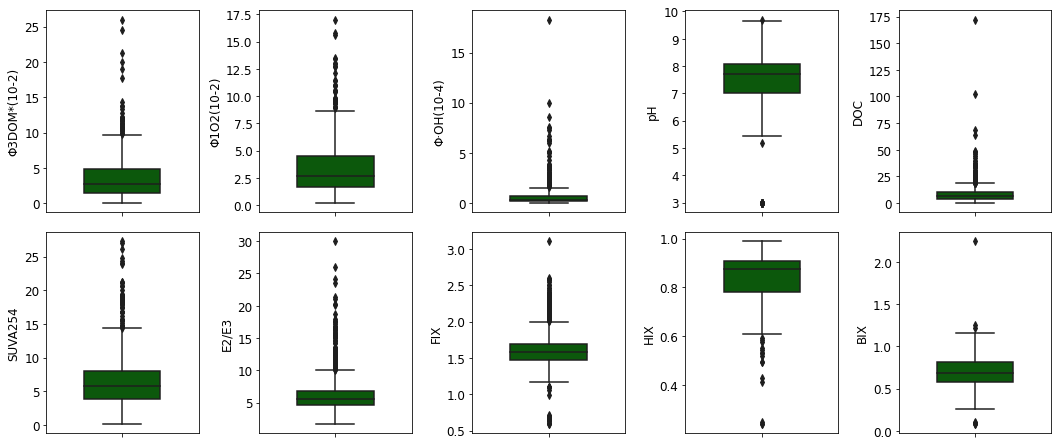

In [6]:
#Boxplot 
a=0
fig = plt.figure(figsize=(18,20))
data1 = pd.concat([rawdata.iloc[:,7:10],rawdata.iloc[:,11:18]],axis=1)
for i in range(10):
    axes = fig.add_subplot(5,5,a+1)
    axes = sns.boxplot(y=data1.iloc[:,i],orient="v",color="darkgreen",width=0.5)
    axes.tick_params(labelsize=12)
    axes.set_ylabel(data1.columns[i],size=12)
    plt.subplots_adjust(wspace=0.4, hspace=0.1)
    a=a+1

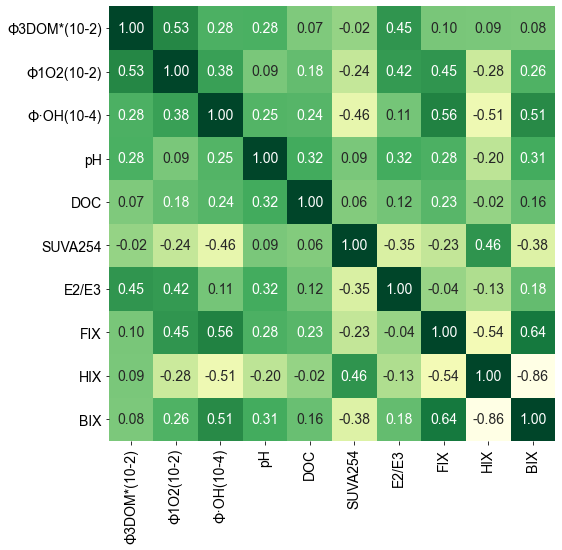

In [7]:
#Correlation heatmap
plt.figure(figsize=(8,8))
h = sns.heatmap(data1.corr(method="spearman"), vmax=1, vmin=-0.8,
            cmap='YlGn',cbar=False,
            annot=True, fmt='.2f', annot_kws={'size':14, 'fontname':'Arial'})
plt.xticks(rotation = 90, fontsize= 14, fontname = "Arial")
plt.yticks(rotation = 0, fontsize= 14, fontname = "Arial")
plt.show()

In [8]:
#Extract the feature for the following missing value imputation
df = rawdata.iloc[:,11:18]
df.describe()

,pH,DOC,SUVA254,E2/E3,FIX,HIX,BIX
count,1228.000000,1329.000000,1313.000000,1323.000000,836.000000,681.000000,677.000000
mean,7.507093,8.650689,6.351162,6.206003,1.635746,0.843352,0.686835
std,0.882760,8.806242,3.868692,2.879921,0.315743,0.104805,0.202008
min,3.000000,0.430000,0.119526,1.685400,0.590000,0.240000,0.080000
25%,7.000000,4.260000,3.803304,4.600000,1.478500,0.783000,0.580000
50%,7.700000,6.350000,5.700000,5.510000,1.580000,0.875000,0.680000
75%,8.072500,10.000000,8.041727,6.800000,1.690000,0.910000,0.818000
max,9.700000,172.200000,27.313580,30.000000,3.110000,0.990000,2.250000


## Missforest imputation

In [9]:
train_idx = []
test_idx = []
df_iter = []
gamma = []
impute_df = []
for b in range(len(df.columns)):
    #Extract the index of the missing value and non-missing value
    train_idx.append(df.iloc[:,b].index[np.where(df.iloc[:,b].notnull())[0]])
    test_idx.append(df.iloc[:,b].index[np.where(df.iloc[:,b].isnull())[0]])

sortindex = np.argsort(df.isnull().sum(axis=0)).values
df_miss = df
#Initialize the stopping criterion
gp=[1,1,1,1,1,1,1]
#Set the iterations 
for a in range(5):
    print("iterations:{}".format(a))
    #In the first imputation, the dataset is imputed by the mean values
    if a < 1:
        df_z = si.SimpleImputer(missing_values = np.nan, strategy='mean').fit_transform(df_miss)
        df_z = pd.DataFrame(df_z, columns = df_miss.columns)
    #After the first imputation, the dataset is replaced by the former imputed dataset  
    else:
        df_z = df_miss.copy()
    
    for i in np.delete(sortindex,0):
        fillc = df_z.iloc[:,i]
        df_new = df_z.iloc[:,df_z.columns != df_z.columns[i]]     
        #Split the dataset
        Ytrain = fillc[train_idx[i]]
        Ytest = fillc[test_idx[i]]
        Xtrain = df_new.loc[train_idx[i],:]
        Xtest = df_new.loc[test_idx[i],:]    
        #Apply the random forest with defualt hyperparameters to impute the missing values
        rfr_impute = se.RandomForestRegressor(random_state=42,oob_score=True)
        rfr_impute = rfr_impute.fit(Xtrain, Ytrain)  
        #Apply cross-validation to explore the imputation performance 
        cv = ms.KFold(n_splits=5, shuffle=True, random_state=42)
        scores = ms.cross_val_score(rfr_impute, Xtrain, Ytrain , cv=cv, scoring='r2')
        cv_R2 = np.mean(scores)
        #Impute
        Ypredict = rfr_impute.predict(Xtest)
        impute_df.append(Ypredict)
        #The imputed feature is filled in the raw dataset
        df_z.loc[test_idx[i],df_z.columns[i]]=Ypredict 
        print(df_miss.columns[i])
        print("Train R2: %.4f" %(rfr_impute.score(Xtrain,Ytrain)))  
        print("CV R2: %.4f (+/- %.4f)" %(cv_R2, scores.std())) 
        print("Oob score: %.4f" %(rfr_impute.oob_score_)) 
        
    #Examine the change of the stopping criterion after imputation
    if a < 1:
        yita = sum(np.array((df_z - df_miss.fillna(value=0))**2))/ sum((np.array(df_z)**2))
    else:
        yita = sum(np.array((df_z - df_miss)**2))/ sum((np.array(df_z)**2))
    print(yita)

    if ((yita - gp) >  0).any():
        break
    gp = yita 
    gamma.append(yita)
    df_iter.append(df_z)
    df_miss = df_z
print("The iteration is converged in:{}".format(a-1))

iterations:0
E2/E3
Train R2: 0.9512
CV R2: 0.6271 (+/- 0.0671)
Oob score: 0.6609
SUVA254
Train R2: 0.9444
CV R2: 0.6063 (+/- 0.1203)
Oob score: 0.6026
pH
Train R2: 0.9081
CV R2: 0.4044 (+/- 0.0579)
Oob score: 0.3957
FIX
Train R2: 0.9707
CV R2: 0.7495 (+/- 0.0855)
Oob score: 0.7821
HIX
Train R2: 0.9713
CV R2: 0.7866 (+/- 0.0190)
Oob score: 0.7955
BIX
Train R2: 0.9762
CV R2: 0.8201 (+/- 0.0545)
Oob score: 0.8302
[0.07024782 0.         0.01675626 0.00349037 0.35348555 0.45909634
 0.51032184]
iterations:1
E2/E3
Train R2: 0.9563
CV R2: 0.6448 (+/- 0.0486)
Oob score: 0.6588
SUVA254
Train R2: 0.9707
CV R2: 0.7789 (+/- 0.0642)
Oob score: 0.7899
pH
Train R2: 0.9501
CV R2: 0.6393 (+/- 0.0741)
Oob score: 0.6550
FIX
Train R2: 0.9749
CV R2: 0.8040 (+/- 0.0349)
Oob score: 0.8170
HIX
Train R2: 0.9726
CV R2: 0.7966 (+/- 0.0130)
Oob score: 0.8040
BIX
Train R2: 0.9768
CV R2: 0.8180 (+/- 0.0595)
Oob score: 0.8296
[0.00088705 0.         0.00017772 0.00014315 0.00228672 0.00100098
 0.00487711]
iterations:2

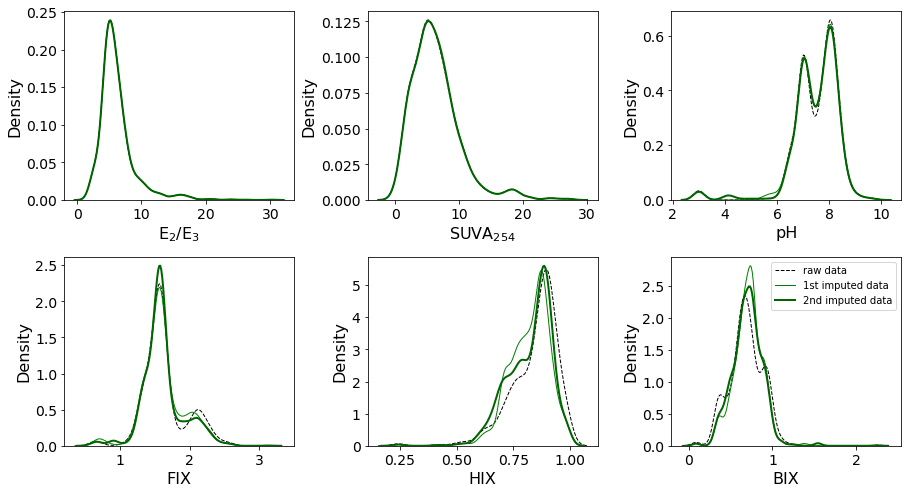

In [10]:
#Plot the change of data distribution after each imputation
a=0
implabel=[ 'pH', 'DOC', '$\mathrm{SUVA_{%d}}$' % (254), '$\mathrm{E_%d/E_%d}$' % (2,3), 'FIX', 'HIX','BIX']
fig = plt.figure(figsize=(15,8))
for i in np.delete(sortindex,0):
    axes = fig.add_subplot(2,3,a+1)
    axes = sns.kdeplot(df.iloc[:,i],color='black',linewidth=1, linestyle='--')
    axes = sns.kdeplot(df_iter[0].iloc[:,i],color='green',linewidth=1)
    axes = sns.kdeplot(df_iter[1].iloc[:,i],color='darkgreen',linewidth=2)
    axes.tick_params(labelsize=14)
    axes.set_xlabel(implabel[i],size=16) 
    axes.set_ylabel('Density',size=16)
    plt.subplots_adjust(wspace=0.32, hspace=0.3)
    a=a+1
plt.legend(['raw data','1st imputed data', '2nd imputed data'],fontsize=10)

In [11]:
#Based on the iterative imputation, the data with second imputation is extracted 
df_iter[1].describe()

,pH,DOC,SUVA254,E2/E3,FIX,HIX,BIX
count,1329.000000,1329.000000,1329.000000,1329.000000,1329.000000,1329.000000,1329.000000
mean,7.469506,8.650689,6.374037,6.209635,1.610804,0.822692,0.699812
std,0.927645,8.806242,3.857318,2.874673,0.292497,0.097619,0.182165
min,3.000000,0.430000,0.119526,1.685400,0.590000,0.240000,0.080000
25%,7.000000,4.260000,3.830000,4.600000,1.470000,0.760000,0.599000
50%,7.655600,6.350000,5.757500,5.513800,1.576000,0.851000,0.709000
75%,8.060000,10.000000,8.041727,6.900000,1.673110,0.892590,0.809139
max,9.700000,172.200000,27.313580,30.000000,3.110000,0.990000,2.250000


In [12]:
#Rearrange the dataset
df1 = pd.concat([rawdata.iloc[:,:7],rawdata.iloc[:,10],df_iter[1],rawdata.iloc[:,7:10],rawdata.iloc[:,18:]],axis=1)
#Delete the bad data point
df2 = df1.drop(labels=range(1012,1023),axis=0)
display(df2.columns)
display(df2.describe(include='all'))

Index(['Reference', 'Number', 'DOM Category', 'Isolation way', 'Light Source',
       'Wavelength Range', 'Actinometry', 'Temperature', 'pH', 'DOC',
       'SUVA254', 'E2/E3', 'FIX', 'HIX', 'BIX', 'Φ3DOM*(10-2)', 'Φ1O2(10-2)',
       'Φ·OH(10-4)', 'TMP (mM)', 'TMP Irradiation Time (h)',
       'Way of Second-order rate constant', 'k3DOM TMP (10-9 M-1 s-1)',
       'Inhibition Correction', 'kq (10-5 s-1)', 'FFA (mM)',
       'FFA Irradiation Time (h)', 'k1O2 FFA (10-8 M-1 s-1)', 'kd (10-5 s-1)',
       'Correction for ·OH', 'Probe type', 'Probe (mM)',
       'Probe Irradiation Time (h)', 'kProbe ·OH (10-9 M-1 s-1)', 'Yield',
       'Correction for DOC'],
      dtype='object')

,Reference,Number,DOM Category,Isolation way,Light Source,Wavelength Range,Actinometry,Temperature,pH,DOC,SUVA254,E2/E3,FIX,HIX,BIX,Φ3DOM*(10-2),Φ1O2(10-2),Φ·OH(10-4),TMP (mM),TMP Irradiation Time (h),Way of Second-order rate constant,k3DOM TMP (10-9 M-1 s-1),Inhibition Correction,kq (10-5 s-1),FFA (mM),FFA Irradiation Time (h),k1O2 FFA (10-8 M-1 s-1),kd (10-5 s-1),Correction for ·OH,Probe type,Probe (mM),Probe Irradiation Time (h),kProbe ·OH (10-9 M-1 s-1),Yield,Correction for DOC
count,1318.000000,1318.000000,1318,1318,1318,1318,1318,1318.000000,1318.000000,1318.000000,1318.000000,1318.000000,1318.000000,1318.000000,1318.000000,1060.000000,782.000000,488.000000,1133.000000,1081.000000,1089,1089.000000,1089,1089.000000,902.000000,894.000000,902.000000,902.000000,902,530,530.000000,521.000000,530.000000,530.000000,530
unique,NaN,NaN,4,3,3,5,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,3,NaN,NaN,NaN,NaN,NaN,3,3,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NOM,None,Xenon Lamp,290-400,PNA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Fit,NaN,Corrected,NaN,NaN,NaN,NaN,NaN,None,TPA,NaN,NaN,NaN,NaN,Negligible
freq,NaN,NaN,853,1143,1057,750,1026,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,609,NaN,514,NaN,NaN,NaN,NaN,NaN,520,370,NaN,NaN,NaN,NaN,232
mean,20.955994,677.454476,NaN,NaN,NaN,NaN,NaN,25.944613,7.467658,8.622508,6.405990,6.223145,1.608513,0.823663,0.698767,3.516741,3.407690,0.758458,0.102442,1.560102,NaN,1.505799,NaN,3.991234,0.066602,2.672058,1.097694,2.590355,NaN,NaN,1.075868,3.897601,5.084340,0.469736,NaN
std,14.528412,391.577644,NaN,NaN,NaN,NaN,NaN,3.480825,0.931253,8.835632,3.857115,2.880980,0.292157,0.097357,0.182450,2.844457,2.512248,1.475032,0.255173,3.363596,NaN,0.769424,NaN,0.976663,0.176692,3.704958,0.121842,0.164461,NaN,NaN,1.154157,11.871466,1.725545,0.205567,NaN
min,1.000000,2.000000,NaN,NaN,NaN,NaN,NaN,20.000000,3.000000,0.430000,0.119526,1.685400,0.590000,0.240000,0.080000,0.093988,0.230000,0.013000,0.003670,0.250000,NaN,0.450000,NaN,2.520000,0.010000,0.500000,0.830000,2.400000,NaN,NaN,0.010000,0.500000,3.300000,0.155000,NaN
25%,8.000000,340.250000,NaN,NaN,NaN,NaN,NaN,25.000000,7.000000,4.207500,3.915100,4.600000,1.470000,0.760171,0.598482,1.532500,1.645000,0.136000,0.005000,0.830000,NaN,0.810000,NaN,3.000000,0.010000,1.500000,1.000000,2.500000,NaN,NaN,0.010000,1.000000,4.200000,0.350000,NaN
50%,16.000000,669.500000,NaN,NaN,NaN,NaN,NaN,25.000000,7.650950,6.300000,5.790265,5.520000,1.575505,0.852140,0.705000,2.790000,2.660000,0.310000,0.005000,1.000000,NaN,1.310000,NaN,3.200000,0.022500,2.000000,1.170000,2.500000,NaN,NaN,1.000000,1.000000,4.400000,0.350000,NaN
75%,32.000000,1000.750000,NaN,NaN,NaN,NaN,NaN,30.000000,8.064200,10.000000,8.060500,6.900000,1.668475,0.893000,0.808305,4.867500,4.467700,0.680750,0.010000,1.000000,NaN,1.800000,NaN,5.000000,0.050000,2.000000,1.200000,2.780000,NaN,NaN,2.000000,2.500000,7.800000,0.630000,NaN


In [13]:
#Ordinalencoding for the categorical feature
enc = sp.OrdinalEncoder()
df3 = df2.copy()
#Extract the categorical feature
catx = df2.iloc[:,2:7]
tran_catx = enc.fit_transform(np.array(catx))
df3.iloc[:,2:7]=tran_catx
display(enc.categories_)
display(df3.iloc[:,2:7].describe(include='all'))

[array(['DBC', 'EfOM', 'Isolate', 'NOM'], dtype=object),
 array(['Extraction', 'Fractionation', 'None'], dtype=object),
 array(['Mercury Lamp', 'UVA Lamp', 'Xenon Lamp'], dtype=object),
 array(['290-400', '290-600', '290-800', '350-400', '365nm'], dtype=object),
 array(['2-NBA', 'Ferrioxalate', 'PNA', 'PNAP', 'Spectroradiometry'],
       dtype=object)]

,DOM Category,Isolation way,Light Source,Wavelength Range,Actinometry
count,1318.000000,1318.000000,1318.000000,1318.000000,1318.000000
mean,2.429439,1.794385,1.745068,0.885432,2.402124
std,0.867422,0.556100,0.551345,1.302908,0.824305
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,2.000000,2.000000,0.000000,2.000000
50%,3.000000,2.000000,2.000000,0.000000,2.000000
75%,3.000000,2.000000,2.000000,1.000000,2.000000
max,3.000000,2.000000,2.000000,4.000000,4.000000


In [14]:
catx1 = df2.loc[:,['Way of Second-order rate constant','Inhibition Correction']].dropna()
tran_catx1 = enc.fit_transform(np.array(catx1))
df3.loc[catx1.index, ['Way of Second-order rate constant','Inhibition Correction']]=tran_catx1
display(enc.categories_)
display(df3.loc[:,['Way of Second-order rate constant','Inhibition Correction']].describe())

[array(['Fit', 'Reference'], dtype=object),
 array(['Corrected', 'Negligible', 'None'], dtype=object)]

,Way of Second-order rate constant,Inhibition Correction
count,1089.0,1089.0
unique,2.0,3.0
top,0.0,0.0
freq,609.0,514.0


In [15]:
catx2 = df2['Correction for ·OH'].dropna()
tran_catx2 = enc.fit_transform(np.array(catx2).reshape(-1,1))
df3.loc[catx2.index,'Correction for ·OH']=tran_catx2
display(enc.categories_)
display(df3['Correction for ·OH'].describe())

[array(['Calculation', 'None', 'Quench'], dtype=object)]

count     902.0
unique      3.0
top         1.0
freq      520.0
Name: Correction for ·OH, dtype: float64

In [16]:
catx3 = df2.loc[:,['Probe type','Correction for DOC']].dropna()
tran_catx3 = enc.fit_transform(np.array(catx3))
df3.loc[catx3.index, ['Probe type','Correction for DOC']]=tran_catx3
display(enc.categories_)
display(df3.loc[:,['Probe type','Correction for DOC']].describe())

[array(['BA', 'Benzene', 'TPA'], dtype=object),
 array(['Corrected', 'Negligible', 'None'], dtype=object)]

,Probe type,Correction for DOC
count,530.0,530.0
unique,3.0,3.0
top,2.0,1.0
freq,370.0,232.0


In [17]:
#Preprocessed data
new_df = df3.drop(columns='Number')
display(new_df.describe(include='all'))
display(new_df.head(10))

,Reference,DOM Category,Isolation way,Light Source,Wavelength Range,Actinometry,Temperature,pH,DOC,SUVA254,E2/E3,FIX,HIX,BIX,Φ3DOM*(10-2),Φ1O2(10-2),Φ·OH(10-4),TMP (mM),TMP Irradiation Time (h),Way of Second-order rate constant,k3DOM TMP (10-9 M-1 s-1),Inhibition Correction,kq (10-5 s-1),FFA (mM),FFA Irradiation Time (h),k1O2 FFA (10-8 M-1 s-1),kd (10-5 s-1),Correction for ·OH,Probe type,Probe (mM),Probe Irradiation Time (h),kProbe ·OH (10-9 M-1 s-1),Yield,Correction for DOC
count,1318.000000,1318.000000,1318.000000,1318.000000,1318.000000,1318.000000,1318.000000,1318.000000,1318.000000,1318.000000,1318.000000,1318.000000,1318.000000,1318.000000,1060.000000,782.000000,488.000000,1133.000000,1081.000000,1089.0,1089.000000,1089.0,1089.000000,902.000000,894.000000,902.000000,902.000000,902.0,530.0,530.000000,521.000000,530.000000,530.000000,530.0
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,3.0,NaN,NaN,NaN,NaN,NaN,3.0,3.0,NaN,NaN,NaN,NaN,3.0
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,1.0,2.0,NaN,NaN,NaN,NaN,1.0
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,609.0,NaN,514.0,NaN,NaN,NaN,NaN,NaN,520.0,370.0,NaN,NaN,NaN,NaN,232.0
mean,20.955994,2.429439,1.794385,1.745068,0.885432,2.402124,25.944613,7.467658,8.622508,6.405990,6.223145,1.608513,0.823663,0.698767,3.516741,3.407690,0.758458,0.102442,1.560102,NaN,1.505799,NaN,3.991234,0.066602,2.672058,1.097694,2.590355,NaN,NaN,1.075868,3.897601,5.084340,0.469736,NaN
std,14.528412,0.867422,0.556100,0.551345,1.302908,0.824305,3.480825,0.931253,8.835632,3.857115,2.880980,0.292157,0.097357,0.182450,2.844457,2.512248,1.475032,0.255173,3.363596,NaN,0.769424,NaN,0.976663,0.176692,3.704958,0.121842,0.164461,NaN,NaN,1.154157,11.871466,1.725545,0.205567,NaN
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000,3.000000,0.430000,0.119526,1.685400,0.590000,0.240000,0.080000,0.093988,0.230000,0.013000,0.003670,0.250000,NaN,0.450000,NaN,2.520000,0.010000,0.500000,0.830000,2.400000,NaN,NaN,0.010000,0.500000,3.300000,0.155000,NaN
25%,8.000000,2.000000,2.000000,2.000000,0.000000,2.000000,25.000000,7.000000,4.207500,3.915100,4.600000,1.470000,0.760171,0.598482,1.532500,1.645000,0.136000,0.005000,0.830000,NaN,0.810000,NaN,3.000000,0.010000,1.500000,1.000000,2.500000,NaN,NaN,0.010000,1.000000,4.200000,0.350000,NaN
50%,16.000000,3.000000,2.000000,2.000000,0.000000,2.000000,25.000000,7.650950,6.300000,5.790265,5.520000,1.575505,0.852140,0.705000,2.790000,2.660000,0.310000,0.005000,1.000000,NaN,1.310000,NaN,3.200000,0.022500,2.000000,1.170000,2.500000,NaN,NaN,1.000000,1.000000,4.400000,0.350000,NaN
75%,32.000000,3.000000,2.000000,2.000000,1.000000,2.000000,30.000000,8.064200,10.000000,8.060500,6.900000,1.668475,0.893000,0.808305,4.867500,4.467700,0.680750,0.010000,1.000000,NaN,1.800000,NaN,5.000000,0.050000,2.000000,1.200000,2.780000,NaN,NaN,2.000000,2.500000,7.800000,0.630000,NaN


,Reference,DOM Category,Isolation way,Light Source,Wavelength Range,Actinometry,Temperature,pH,DOC,SUVA254,E2/E3,FIX,HIX,BIX,Φ3DOM*(10-2),Φ1O2(10-2),Φ·OH(10-4),TMP (mM),TMP Irradiation Time (h),Way of Second-order rate constant,k3DOM TMP (10-9 M-1 s-1),Inhibition Correction,kq (10-5 s-1),FFA (mM),FFA Irradiation Time (h),k1O2 FFA (10-8 M-1 s-1),kd (10-5 s-1),Correction for ·OH,Probe type,Probe (mM),Probe Irradiation Time (h),kProbe ·OH (10-9 M-1 s-1),Yield,Correction for DOC
0,1,3.0,2.0,1.0,3.0,0.0,30,8.1,5.81,5.191858,11.10,1.58292,0.871740,0.69550,2.08,1.05,0.235,1.000,30.0,1.0,2.50,1.0,5.0,0.100,30.0,1.2,2.5,1.0,1.0,2.0,30.0,7.8,0.95,1.0
1,1,3.0,2.0,1.0,3.0,0.0,30,7.7,6.90,4.882360,9.20,1.55917,0.860790,0.71691,1.21,0.69,0.101,1.000,30.0,1.0,2.50,1.0,5.0,0.100,30.0,1.2,2.5,1.0,1.0,2.0,30.0,7.8,0.95,1.0
2,1,3.0,2.0,1.0,3.0,0.0,30,7.9,5.52,4.290172,11.30,1.59148,0.860080,0.71870,1.54,0.98,0.040,1.000,30.0,1.0,2.50,1.0,5.0,0.100,30.0,1.2,2.5,1.0,1.0,2.0,30.0,7.8,0.95,1.0
3,1,3.0,2.0,1.0,3.0,0.0,30,6.4,3.25,5.027626,5.50,1.47444,0.871980,0.50710,0.48,0.58,0.142,1.000,30.0,1.0,2.50,1.0,5.0,0.100,30.0,1.2,2.5,1.0,1.0,2.0,30.0,7.8,0.95,1.0
4,1,3.0,2.0,1.0,3.0,0.0,30,6.9,0.59,8.439129,4.60,1.30198,0.874330,0.42741,0.67,0.69,0.091,1.000,30.0,1.0,2.50,1.0,5.0,0.100,30.0,1.2,2.5,1.0,1.0,2.0,30.0,7.8,0.95,1.0
5,2,2.0,2.0,1.0,3.0,2.0,25,8.0,2.00,7.645960,4.74,1.59660,0.861100,0.68660,2.55,1.90,NaN,0.025,1.0,1.0,1.26,1.0,3.0,0.025,2.0,1.2,2.4,1.0,NaN,NaN,NaN,NaN,NaN,NaN
6,2,2.0,1.0,1.0,3.0,2.0,25,8.0,2.00,6.125980,5.86,1.64186,0.902820,0.67362,5.29,3.30,NaN,0.025,1.0,1.0,1.26,1.0,3.0,0.025,2.0,1.2,2.4,1.0,NaN,NaN,NaN,NaN,NaN,NaN
7,2,2.0,1.0,1.0,3.0,2.0,25,8.0,2.00,5.458110,5.31,1.62478,0.885640,0.66546,3.29,2.30,NaN,0.025,1.0,1.0,1.26,1.0,3.0,0.025,2.0,1.2,2.4,1.0,NaN,NaN,NaN,NaN,NaN,NaN
8,2,2.0,1.0,1.0,3.0,2.0,25,8.0,2.00,7.784140,4.58,1.57407,0.840070,0.70306,1.76,1.67,NaN,0.025,1.0,1.0,1.26,1.0,3.0,0.025,2.0,1.2,2.4,1.0,NaN,NaN,NaN,NaN,NaN,NaN
9,2,2.0,1.0,1.0,3.0,2.0,25,8.0,2.00,11.791360,3.79,1.57954,0.795349,0.78197,1.12,1.20,NaN,0.025,1.0,1.0,1.26,1.0,3.0,0.025,2.0,1.2,2.4,1.0,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
#Export the preprocessed data
new_df.to_excel('Preprocessed AQY data.xlsx')